### Import des libraries

In [55]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

### Fonctions

In [56]:
def prep_df(df, ratio):
    '''Fonction qui divise le dataframe selon un ratio sélectionné
    ARGS:
        df: dataframe
        ratio: ratio de division du df'''

    df_sort = df.sort_values('Recence').reset_index()
    num_lignes = round(df_sort.shape[0] * ratio)
    df1 = df_sort.iloc[:num_lignes, :]
    return df1.drop('index', axis=1)


In [57]:
def div_pas (df,t1,  semaine):
    '''Fonction pour diviser le df en semaines
    ARGS:
        df: dataframe
        t1 : date limite
        seamaines : numéro des semaines à considerer'''

    # Calculer le pas en jours en fonction du pas en semaines spécifié
    step = 7 * semaine
    # Trouver la date la plus ancienne et la plus récente dans la colonne 'Recence'
    ancienne, nouv = min(df['Recence']), max(df['Recence'])
    # Calculer la durée totale en jours
    nb = nouv - ancienne
    # Init liste pour stocker les différents pas de temps
    T = []
    t = t1
    # Générer les pas de temps jusqu'à la date la plus récente
    while t < nouv:
        T.append(t)
        t += step
    # Supprimer le premier élément de la liste car il est égal à t1
    T.pop(0)
    return T

### Import des fichiers

In [58]:
# Import des du fichier
df = pd.read_csv('../data/processed/RFM_clust.csv')

In [59]:
#affichage du df
display(df.head(3))

,Recence,Frequence,Montant,Cluster
0,162,1,141.90,2
1,165,1,27.19,1
2,587,1,86.22,4


### Simulation mise à jour

In [60]:
# create first dataset with half data
ratio = 0.5

df1 = prep_df(df, ratio)
print('lignes dans le df',df.shape[0])
print('lignes dans le df divisées',df1.shape[0])

lignes dans le df 93458
lignes dans le df divisées 46729


In [61]:
# définition pas de la boucle 
pas_semaines = 1
t1 = df1['Recence'].max()

In [62]:
T = div_pas(df, t1, pas_semaines)

#### Stabilité à l’initialisation

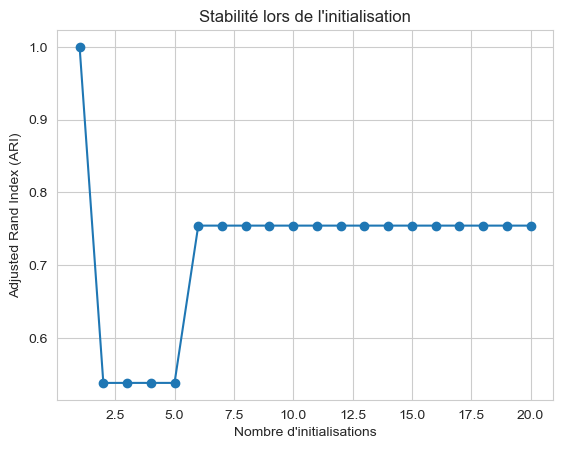

In [63]:
# Range des clusters à tester
n_init_range = range(1, 21)

# création list avec valeurs ARI
ari_values = []

# Itérer sur différentes initialisations
for n_init_value in n_init_range:
    model = KMeans(n_clusters=k_opti, random_state=0, n_init=n_init_value, init='k-means++', max_iter=300)
    model.fit(X_0)
    labels = model.labels_
    ari = adjusted_rand_score(model_0.labels_, labels)
    ari_values.append(ari)

# plot des valeurs ARI
plt.plot(n_init_range, ari_values, marker='o')
plt.title('Stabilité lors de l\'initialisation')
plt.xlabel('Nombre d\'initialisations')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.show()

In [64]:
k_opti = 6

In [65]:
# train original model and scaler on df_0
X_0 = df1.to_numpy()
scaler_0 = StandardScaler().fit(X_0)
X_0 = scaler_0.transform(X_0)

model_0 = KMeans(n_clusters=k_opti, random_state=0, n_init=10,init='k-means++', max_iter=300)
model_0.fit(X_0)

KMeans(n_clusters=6, n_init=10, random_state=0)

#### Calcul ARI et plot graphique

In [66]:
scores = []

for t in T:
    # Sélectionner les données jusqu'au temps t
    df_t = df[df['Recence'] <= t]
    # Conversion des données en tableau numpy
    X_t = df_t.to_numpy()
    # Standardisation des données à chaque étape de temps
    scaler_t = StandardScaler().fit(X_t)
    X_t_scaled = scaler_t.transform(X_t)
    # Adaptation des données à l'échelle de référence
    X_t_old_scaler = scaler_0.transform(X_t)
    # Application du modèle KMeans sur les données standardisées
    model_t = KMeans(n_clusters=k_opti, 
                     random_state=0, 
                     n_init=10, 
                     init='k-means++', 
                     max_iter=300)
    # fit du modèle
    model_t.fit(X_t_scaled)
    pred_t = model_t.predict(X_t_scaled)
    # Prédict des clusters avec le modèle de référence
    pred_0 = model_0.predict(X_t_old_scaler)
    # Calcul des scores d'ajustement entre les deux jeux de prédictions
    score = adjusted_rand_score(pred_t, pred_0)
    scores.append(score)


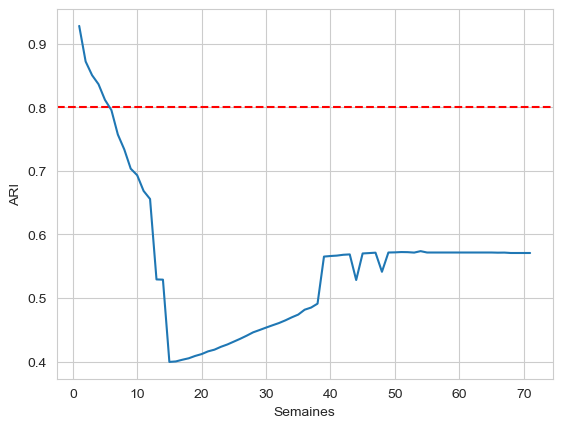

In [67]:
# affichage graphique
weeks = [(i+1) * pas_semaines for i in range(len(scores))]

plt.axhline(y=0.8, color='red', linestyle='--')
plt.plot(weeks, scores)
plt.xlabel('Semaines')
plt.ylabel('ARI')
plt.show()